In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
ds=pd.read_excel('Data_Train.xlsx')



In [3]:
ds.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
ds.isnull().sum()
ds.dropna(inplace=True)

In [6]:
# Duration has time like 2hr 30 that computer can think so we are preprocesing it 

In [7]:
ds['journey_day']=pd.to_datetime(ds.Date_of_Journey,format='%d/%m/%Y').dt.day
ds['journey_month']=pd.to_datetime(ds.Date_of_Journey,format='%d/%m/%Y').dt.month
ds.drop(['Date_of_Journey'],axis=1,inplace=True)



In [8]:
ds['dep_hour']=pd.to_datetime(ds.Dep_Time,format='%H:%M').dt.hour
ds['dep_min']=pd.to_datetime(ds.Dep_Time,format='%H:%M').dt.minute
ds.drop(['Dep_Time'],axis=1,inplace=True)





In [9]:
ds['arr_hour']=pd.to_datetime(ds.Arrival_Time).dt.hour
ds['arr_min']=pd.to_datetime(ds.Arrival_Time).dt.minute
ds.drop(['Arrival_Time'],axis=1,inplace=True)





In [10]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(ds["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [11]:

ds['dur_min']=duration_mins
ds['dur_hour']=duration_hours
ds.drop(['Duration'],axis=1,inplace=True)



In [12]:
ds['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [13]:
ds.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

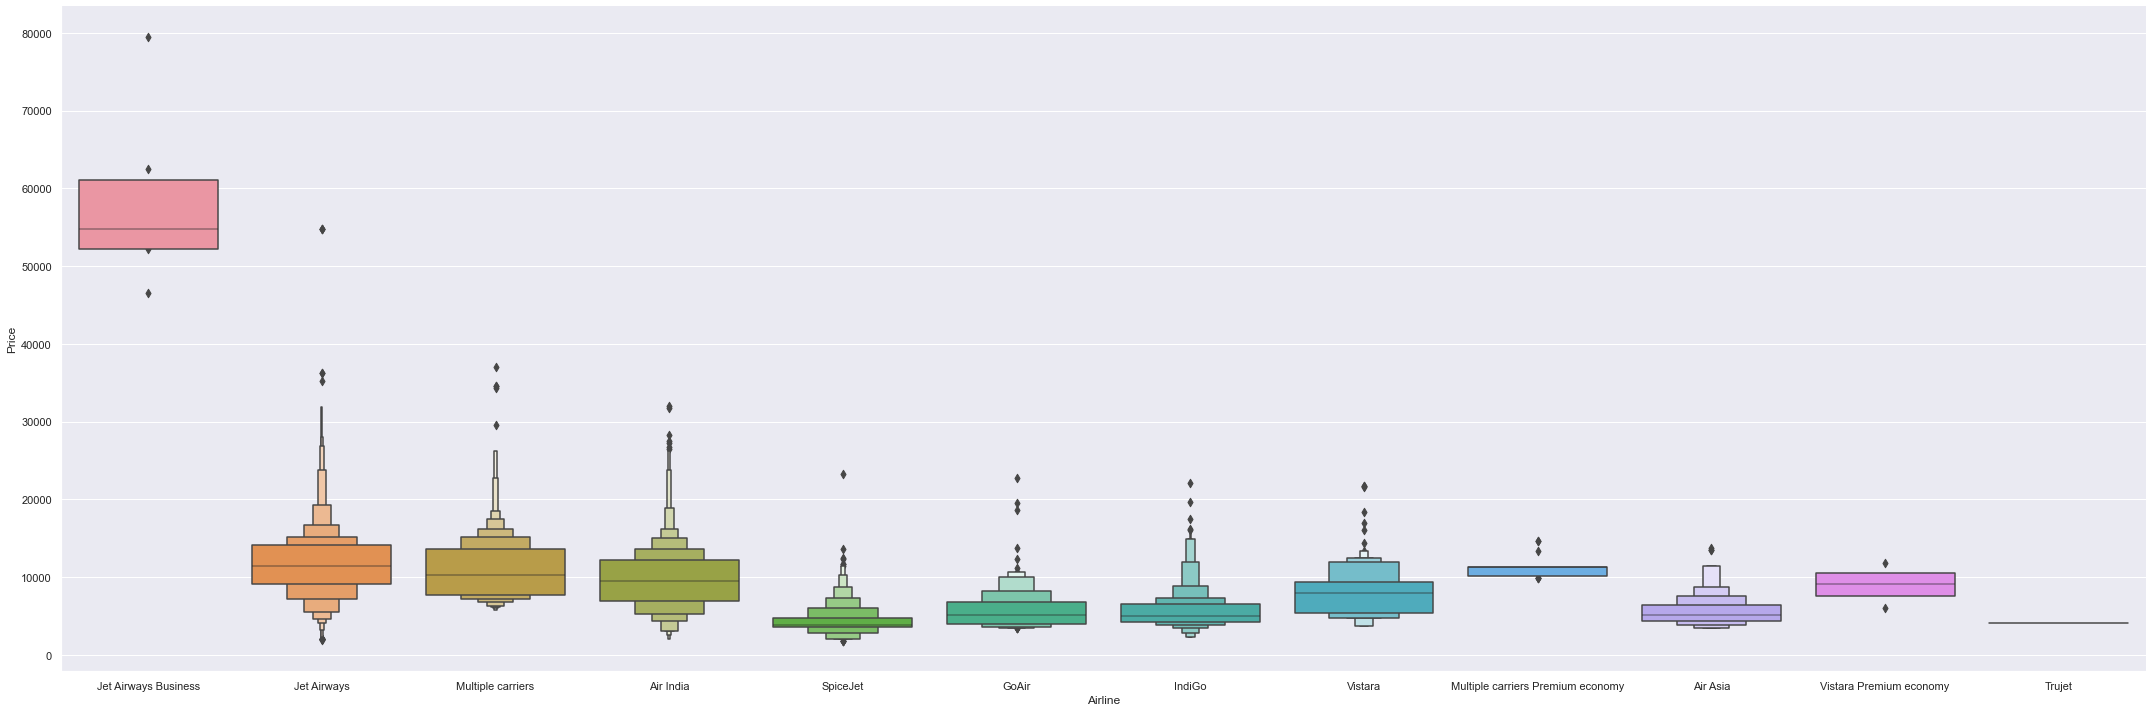

In [14]:

sns.catplot(y='Price',x='Airline',data=ds.sort_values('Price',ascending=False),height=10,aspect=3,kind='boxen')

In [15]:
Airline=ds['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()


,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [16]:
Source=ds['Source']
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [17]:
Destination=ds['Destination']
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [18]:
ds

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,dur_min,dur_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,50,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,25,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,0,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,25,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,45,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0,No info,4107,9,4,19,55,22,25,30,2
10679,Air India,Kolkata,Banglore,CCU → BLR,0,No info,4145,27,4,20,45,23,20,35,2
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0,No info,7229,27,4,8,20,11,20,0,3
10681,Vistara,Banglore,New Delhi,BLR → DEL,0,No info,12648,1,3,11,30,14,10,40,2


In [19]:
ds.drop(['Route'],axis=1,inplace=True)

In [20]:
ds


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,dur_min,dur_hour
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,50,2
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,25,7
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,0,19
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,25,5
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,45,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,4107,9,4,19,55,22,25,30,2
10679,Air India,Kolkata,Banglore,0,No info,4145,27,4,20,45,23,20,35,2
10680,Jet Airways,Banglore,Delhi,0,No info,7229,27,4,8,20,11,20,0,3
10681,Vistara,Banglore,New Delhi,0,No info,12648,1,3,11,30,14,10,40,2


In [23]:
ds=pd.concat([ds,Airline,Source,Destination],axis=1)

In [30]:
ds.columns

Index(['Total_Stops', 'Additional_Info', 'Price', 'journey_day',
       'journey_month', 'dep_hour', 'dep_min', 'arr_hour', 'arr_min',
       'dur_min', 'dur_hour', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [25]:
ds.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [48]:
X = ds.loc[:, ['Total_Stops', 'journey_day',
       'journey_month', 'dep_hour', 'dep_min', 'arr_hour', 'arr_min',
       'dur_min', 'dur_hour', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi']]
X.head()

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,dur_min,dur_hour,Air India,...,Kolkata,Kolkata,Mumbai,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi
0,0,24,3,22,20,1,10,50,2,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,25,7,1,...,1,0,0,0,0,0,0,1,0,0
2,2,9,6,9,25,4,25,0,19,0,...,0,0,0,1,1,0,0,0,0,0
3,1,12,5,18,5,23,30,25,5,0,...,1,0,0,0,0,0,0,1,0,0
4,1,1,3,16,50,21,35,45,4,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
y=ds.loc[:,'Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [50]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [51]:
print(selection.feature_importances_)

[2.42966195e-01 1.43017893e-01 5.37552928e-02 2.45165710e-02
 2.09013920e-02 2.76839676e-02 1.89295021e-02 1.80424573e-02
 1.03817941e-01 9.76267752e-03 1.93727653e-03 1.84539888e-02
 1.42745950e-01 6.70671435e-02 1.90548878e-02 8.82770739e-04
 3.07960683e-03 8.90418475e-05 5.00252791e-03 8.63835609e-05
 2.77898126e-04 8.17695476e-03 5.48910397e-03 1.83568161e-03
 4.41483845e-04 6.38114544e-03 6.83006579e-03 8.16655919e-03
 8.55914665e-03 5.52905084e-03 1.68869331e-03 2.60272749e-04
 2.45704769e-02]


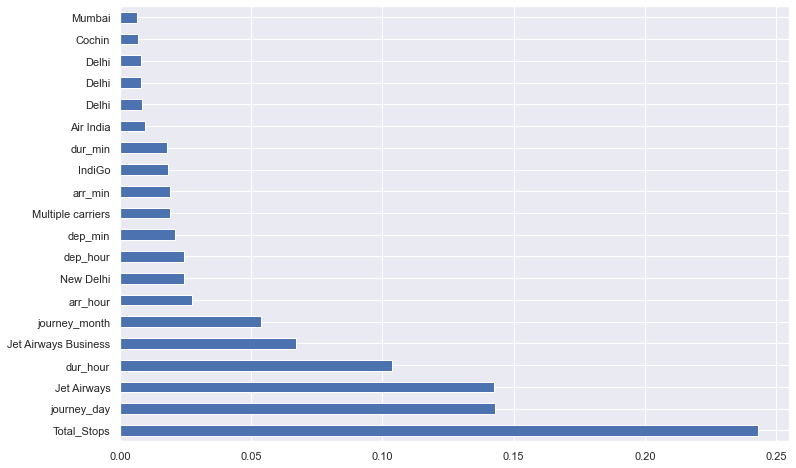

In [61]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()



In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train,Y_train)

RandomForestRegressor()

In [67]:
y_predict=forest.predict(X_test)
forest.score(X_train,Y_train)

0.952689520805189

In [68]:
forest.score(X_test,Y_test)

0.7973296358000482

/Users/shashankbisht/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


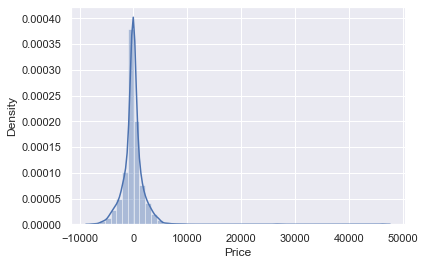

In [73]:
sns.distplot(Y_test-y_predict)
plt.show()

# folowing gusassian distribution

In [76]:
from sklearn import metrics
metrics.r2_score(Y_test, y_predict)


0.7973296358000482